# Лабораторная работа №5. Визуализация данных

In [4]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Pandas version: {pd.__version__}")

%matplotlib inline

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Pandas version: 2.2.2


## Задача 1

Постройте два линейных графика функции  image.png на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].




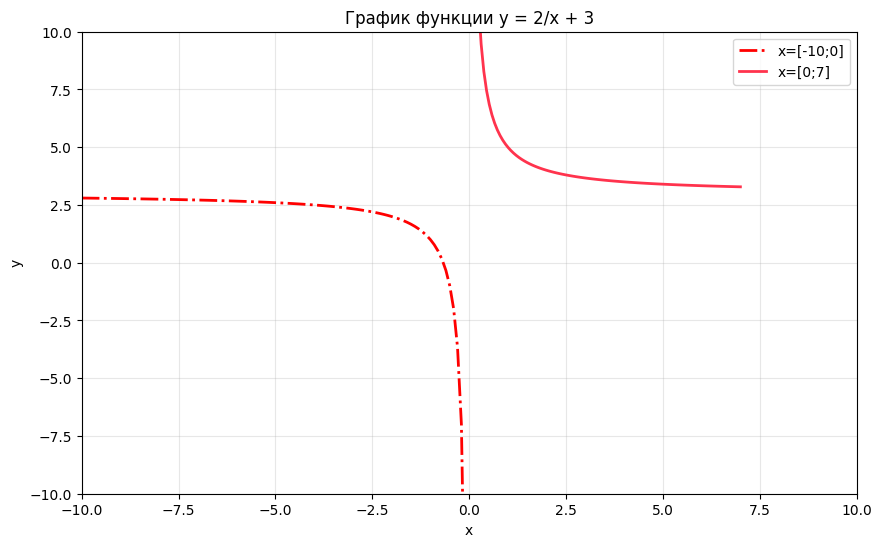

In [5]:
x1 = np.linspace(-10, -0.1, 100)
y1 = 2/x1 + 3


x2 = np.linspace(0.1, 7, 100)
y2 = 2/x2 + 3


plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='red', linestyle='-.', linewidth=2, label='x=[-10;0]')
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', linewidth=2, label='x=[0;7]')


plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y = 2/x + 3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Задача 2

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

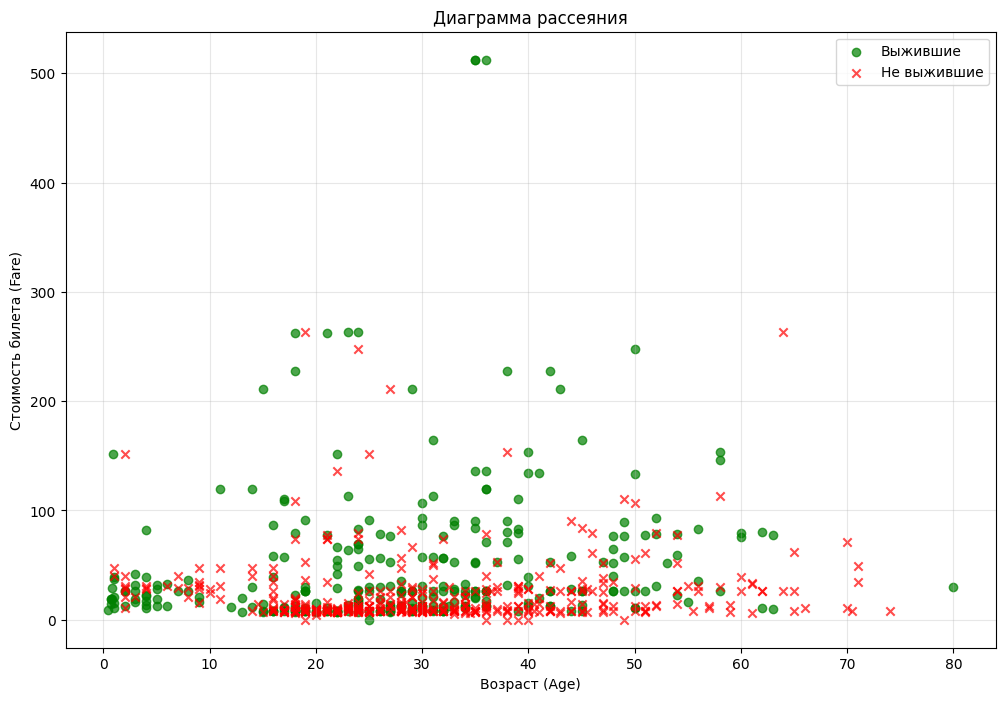

In [19]:
titanic_df = pd.read_csv('/titanic.csv')

titanic_clean = titanic_df.dropna(subset=['Age', 'Fare'])

survived = titanic_clean[titanic_clean['Survived'] == 1]
not_survived = titanic_clean[titanic_clean['Survived'] == 0]


plt.figure(figsize=(12, 8))


plt.scatter(survived['Age'], survived['Fare'],
           c='green', marker='o', alpha=0.7, label='Выжившие')

plt.scatter(not_survived['Age'], not_survived['Fare'],
           c='red', marker='x', alpha=0.7, label='Не выжившие')

plt.xlabel('Возраст (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Задача 3

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

Создание матрицы диаграмм рассеяния...


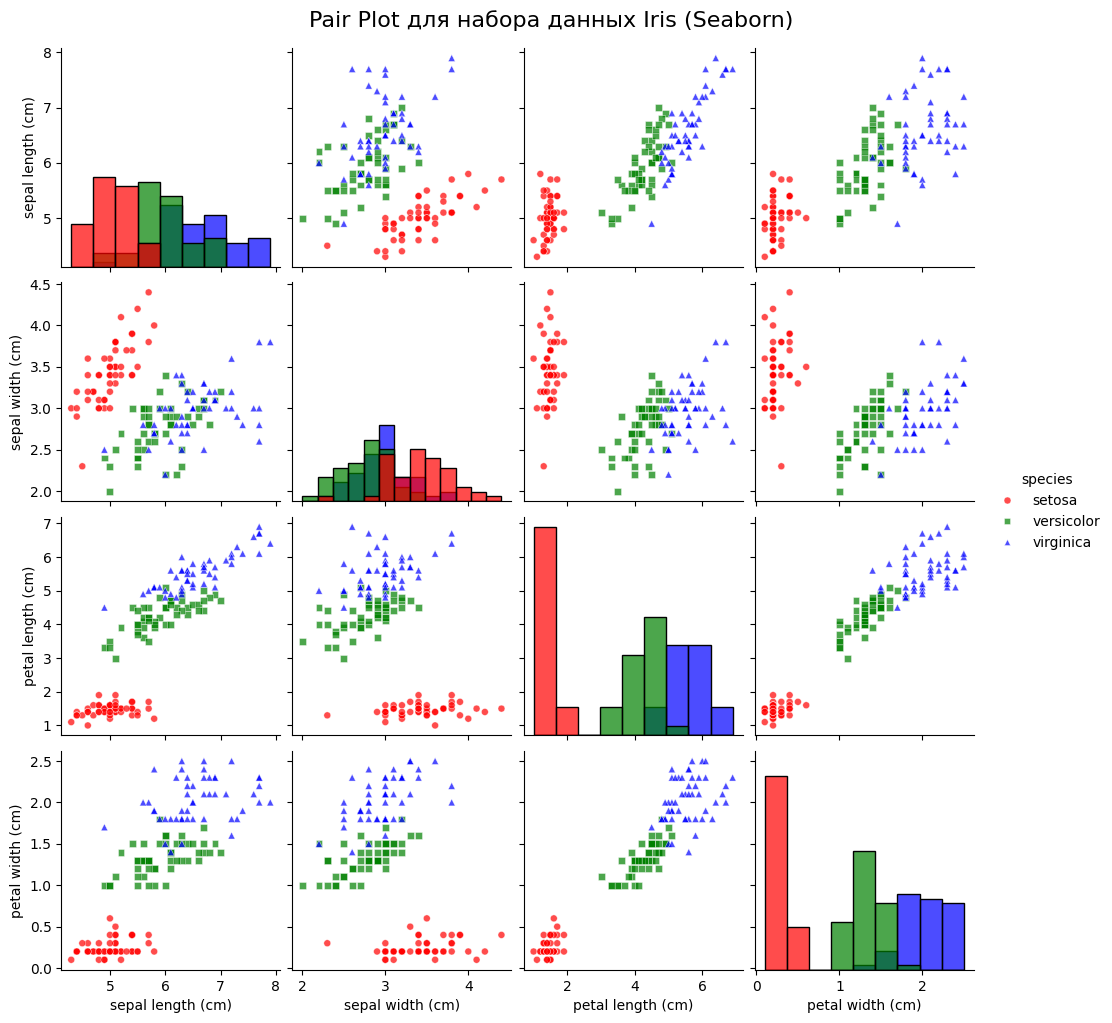

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]


print("Создание матрицы диаграмм рассеяния...")
g = sns.pairplot(df, hue='species',
                 palette={'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'},
                 diag_kind='hist', markers=['o', 's', '^'],
                 plot_kws={'alpha': 0.7, 's': 25},
                 diag_kws={'alpha': 0.7})

g.fig.suptitle('Pair Plot для набора данных Iris (Seaborn)', y=1.02, fontsize=16)
plt.show()

## Задача 4

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

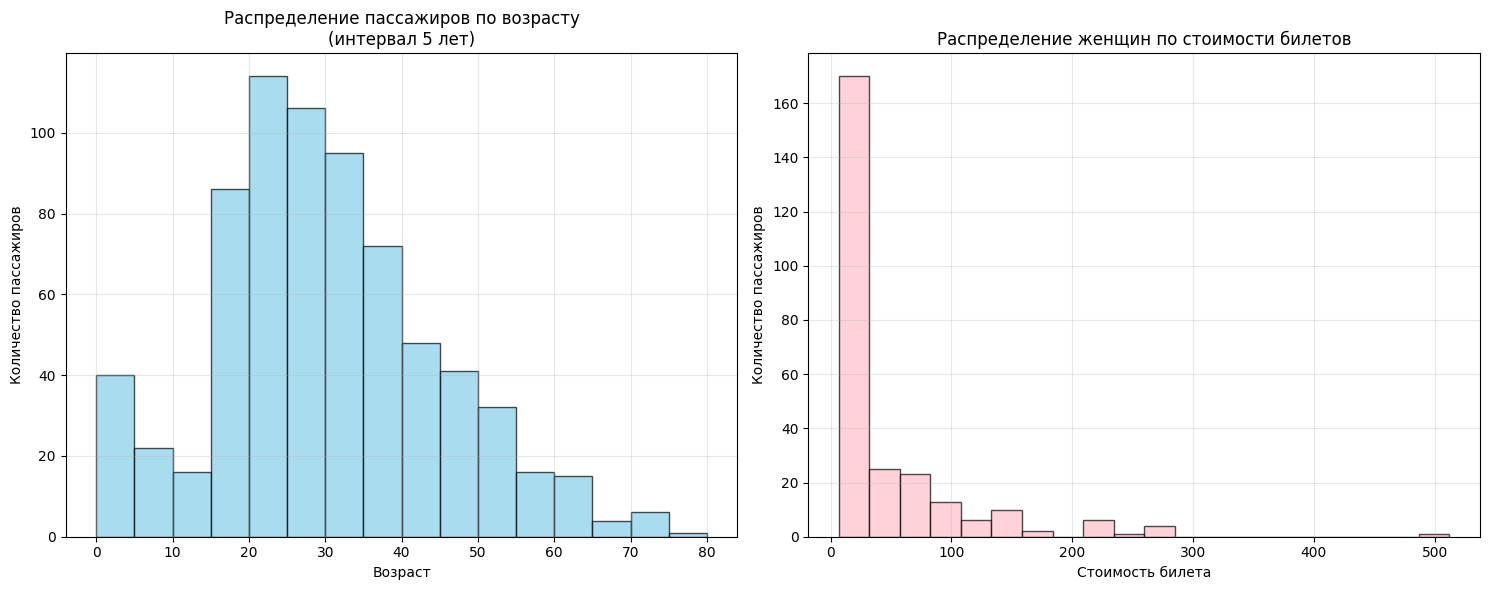

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.hist(titanic_clean['Age'], bins=range(0, 85, 5), alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество пассажиров')
ax1.set_title('Распределение пассажиров по возрасту\n(интервал 5 лет)')
ax1.grid(True, alpha=0.3)

female_passengers = titanic_clean[titanic_clean['Sex'] == 'female']
ax2.hist(female_passengers['Fare'], bins=20, alpha=0.7, color='pink', edgecolor='black')
ax2.set_xlabel('Стоимость билета')
ax2.set_ylabel('Количество пассажиров')
ax2.set_title('Распределение женщин по стоимости билетов')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задача 5

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

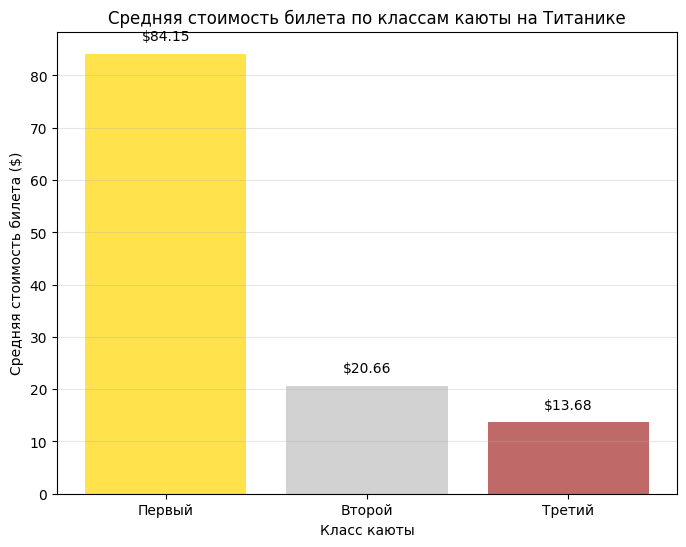

In [29]:

fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(fare_by_class.index, fare_by_class.values,
               color=['gold', 'silver', 'brown'], alpha=0.7)

for bar, value in zip(bars, fare_by_class.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'${value:.2f}', ha='center', va='bottom')

plt.xlabel('Класс каюты')
plt.ylabel('Средняя стоимость билета ($)')
plt.title('Средняя стоимость билета по классам каюты на Титанике')
plt.xticks([1, 2, 3], ['Первый', 'Второй', 'Третий'])
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## Задача 6

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

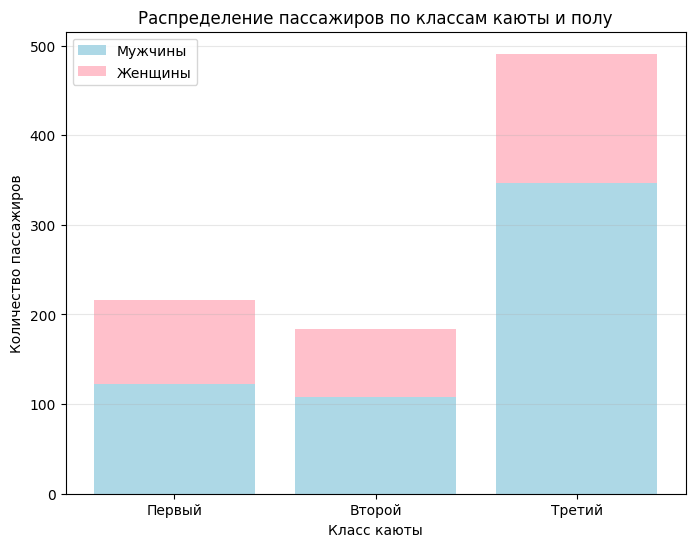

In [30]:
passengers_by_class_sex = titanic_df.groupby(['Pclass', 'Sex']).size().unstack()

plt.figure(figsize=(8, 6))
bars = plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['male'],
               label='Мужчины', color='lightblue')
plt.bar(passengers_by_class_sex.index, passengers_by_class_sex['female'],
        bottom=passengers_by_class_sex['male'], label='Женщины', color='pink')

plt.xlabel('Класс каюты')
plt.ylabel('Количество пассажиров')
plt.title('Распределение пассажиров по классам каюты и полу')
plt.xticks([1, 2, 3], ['Первый', 'Второй', 'Третий'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## Задача 7

Для набора данных iris постройте круговую диаграмму

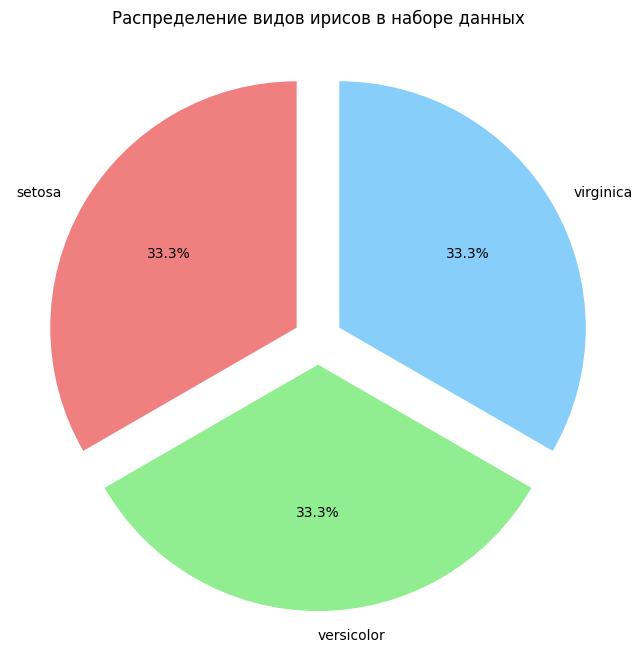

In [31]:
species_counts = np.bincount(iris.target)
species_names = iris.target_names


explode = [0.1 if count == max(species_counts) else 0 for count in species_counts]

plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_names, autopct='%1.1f%%',
        explode=explode, startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Распределение видов ирисов в наборе данных')
plt.show()

Задача 8

Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

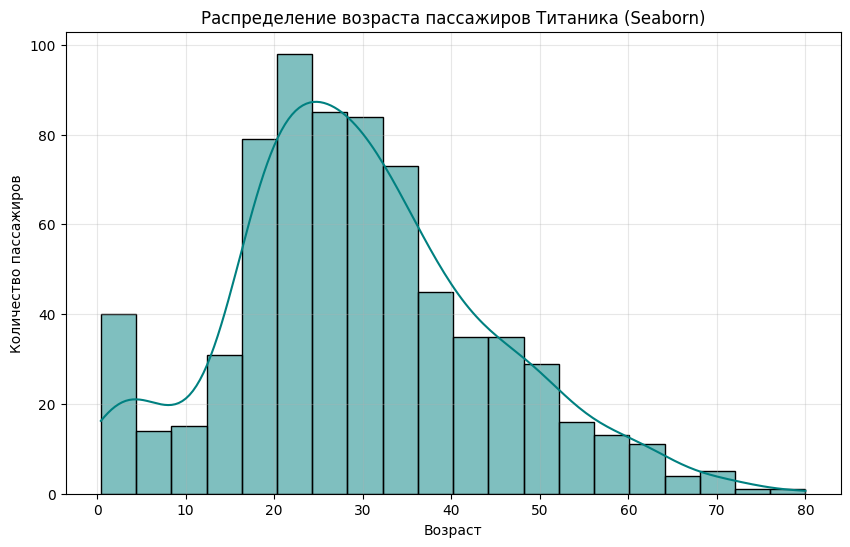

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_clean, x='Age', bins=20, kde=True, color='teal')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров Титаника (Seaborn)')
plt.grid(True, alpha=0.3)
plt.show()